In [1]:
import numpy as np
import pandas as pd

## Task 1: Download your data and load them into the Python.
You can find them [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing).

- Features and response variables are in different files
- be careful about number of spaces between the values in the file

In [2]:
folder_path = '/home/henri/Documents/Lighthouse lab/Databases/w5-d2-db/Smartphone Sensor Data/Smartphone Sensor Data'
x_train_path = '/home/henri/Documents/Lighthouse lab/Databases/w5-d2-db/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt'
y_train_path = '/home/henri/Documents/Lighthouse lab/Databases/w5-d2-db/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt'
x_test_path = '/home/henri/Documents/Lighthouse lab/Databases/w5-d2-db/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt'
y_test_path = '/home/henri/Documents/Lighthouse lab/Databases/w5-d2-db/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt'

label_path = '/home/henri/Documents/Lighthouse lab/Databases/w5-d2-db/UCI HAR Dataset/UCI HAR Dataset/features.txt'

In [3]:
label = pd.read_fwf(label_path,names=['features'])
label.iloc[:,0]

0                   1 tBodyAcc-mean()-X
1                   2 tBodyAcc-mean()-Y
2                   3 tBodyAcc-mean()-Z
3                    4 tBodyAcc-std()-X
4                    5 tBodyAcc-std()-Y
                     ...               
556    557 angle(tBodyGyroMean,gravityM
557    558 angle(tBodyGyroJerkMean,grav
558            559 angle(X,gravityMean)
559            560 angle(Y,gravityMean)
560            561 angle(Z,gravityMean)
Name: features, Length: 561, dtype: object

In [4]:
label

,features
0,1 tBodyAcc-mean()-X
1,2 tBodyAcc-mean()-Y
2,3 tBodyAcc-mean()-Z
3,4 tBodyAcc-std()-X
4,5 tBodyAcc-std()-Y
...,...
556,"557 angle(tBodyGyroMean,gravityM"
557,"558 angle(tBodyGyroJerkMean,grav"
558,"559 angle(X,gravityMean)"
559,"560 angle(Y,gravityMean)"


In [5]:
X_test = pd.read_fwf(x_test_path,names=label.iloc[:,0])
y_test = pd.read_fwf(y_test_path,names=['activity_type'])

In [6]:
X_train = pd.read_fwf(x_train_path,names=label.iloc[:,0])
y_train = pd.read_fwf(y_train_path,names=['activity_type'])

In [7]:
y_test.columns

Index(['activity_type'], dtype='object')

In [8]:
X_train.shape

(7352, 561)

In [9]:
X_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFre,553 fBodyBodyGyroJerkMag-skewnes,554 fBodyBodyGyroJerkMag-kurtosi,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),grav","557 angle(tBodyGyroMean,gravityM","558 angle(tBodyGyroJerkMean,grav","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [10]:
type(y_test)

pandas.core.frame.DataFrame

## Task 2: Create Binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent binary variable indicating if person is walking or not

In [11]:
def df_replace(y):
    for i in y.index:
        val = y._get_value(i,'activity_type')
        if val in [1,2,3]:
            # walking
            y._set_value( i,'activity_type',1)
        if val in [4,5,6]:
            # running
            y._set_value( i,'activity_type',0)

In [12]:
df_replace(y_test)
df_replace(y_train)

In [13]:
y_test.head()

,activity_type
0,0
1,0
2,0
3,0
4,0


## Task 3

+ Create Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y
+ Compare the results of Logistic regressions from different Python packages (sklearn, statsmodel)
+ Plot the FIT of predicted probabilities to the original values

## Sklearn

In [14]:
import sklearn.model_selection as model_selection
#X_train,X_test,y_train,y_test=model_selection.train_test_split(X['54 tGravityAcc-min()-Y'],y['activity_type'],test_size=0.25,random_state=0)

In [15]:
X_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFre,553 fBodyBodyGyroJerkMag-skewnes,554 fBodyBodyGyroJerkMag-kurtosi,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),grav","557 angle(tBodyGyroMean,gravityM","558 angle(tBodyGyroJerkMean,grav","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [16]:
y_train.shape

(7352, 1)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
X_train_t3 = np.reshape(X_train['54 tGravityAcc-min()-Y'].values, (-1, 1)) # sklearn: typically designed for more than 1 features. What -1,1 does is that it pushes our data to the left
X_train_t3.shape

(7352, 1)

In [19]:
X_test_t3 = np.reshape(X_test['54 tGravityAcc-min()-Y'].values, (-1, 1))
X_test_t3.shape

(2947, 1)

In [20]:
X_train_t3[0:2]

array([[-0.12321341],
       [-0.11489334]])

In [21]:
X_train_t3.dtype #ensure your data is float

dtype('float64')

In [22]:
y_train['activity_type'].unique()

array([0, 1])

In [23]:
# fit the model with data
logreg.fit(X_train_t3,y_train['activity_type'])

y_pred=logreg.predict(X_test_t3)

In [24]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1045,  515],
       [ 367, 1020]])

In [25]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## Matplotlib
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (12,8)

Text(0.5, 510.88, 'Predicted label')

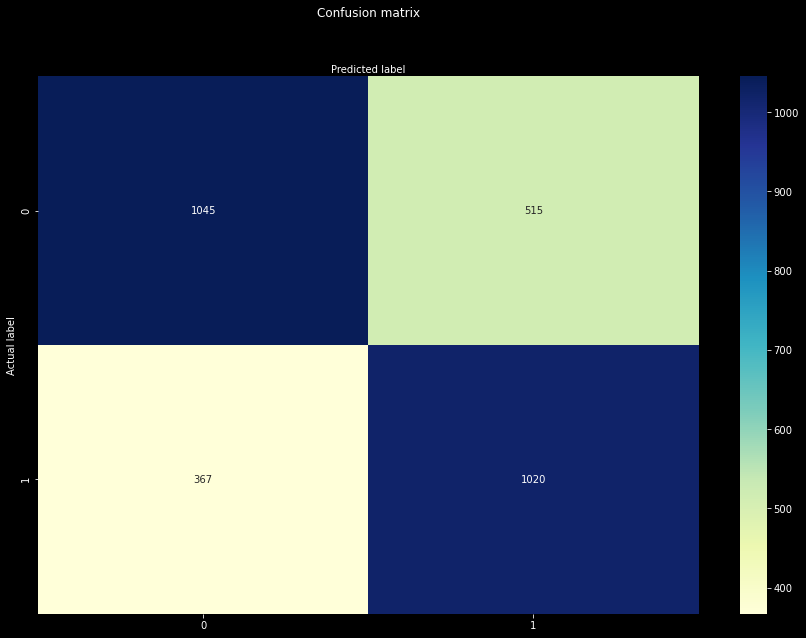

In [26]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7007125890736342
Precision: 0.6644951140065146
Recall: 0.7354001441961067


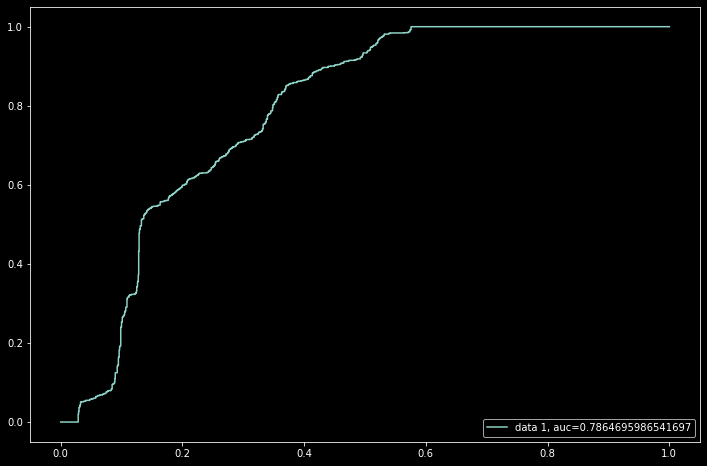

In [28]:
y_pred_proba = logreg.predict_proba(X_test_t3)[::,1]
fpr, tpr, _ = metrics.roc_curve(np.asarray(y_test),  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Statsmodels

In [29]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [30]:
#https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/
log_reg = sm.Logit(y_train['activity_type'],X_train_t3).fit()

Optimization terminated successfully.
         Current function value: 0.494212
         Iterations 7


In [31]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          activity_type   No. Observations:                 7352
Model:                          Logit   Df Residuals:                     7351
Method:                           MLE   Df Model:                            0
Date:                Wed, 14 Oct 2020   Pseudo R-squ.:                  0.2811
Time:                        09:47:06   Log-Likelihood:                -3633.4
converged:                       True   LL-Null:                       -5054.4
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -5.1002      0.129    -39.642      0.000      -5.352      -4.848
==============================================================================
"""

In [32]:
y_pred = log_reg.predict(X_test_t3) 
prediction = list(map(round, y_pred)) 

In [33]:
y_pred

array([0.79200493, 0.79200493, 0.79158561, ..., 0.79701099, 0.77699348,
       0.77530568])

In [34]:
y_test['activity_type']

0       0
1       0
2       0
3       0
4       0
       ..
2942    1
2943    1
2944    1
2945    1
2946    1
Name: activity_type, Length: 2947, dtype: int64

In [35]:
# comparing original and predicted values of y 
#print('Acutal values', list(y_test['activity_type'].values)) 
#print('Predictions :', prediction) 

In [36]:
cnf_matrix = metrics.confusion_matrix(y_test['activity_type'], y_pred.round())
cnf_matrix

array([[ 858,  702],
       [ 136, 1251]])

In [37]:
print('Accuracy:',metrics.accuracy_score(y_test['activity_type'], y_pred.round()))
print('Precision:',metrics.precision_score(y_test['activity_type'], y_pred.round(),average='macro'))
print('Recall:',metrics.recall_score(y_test['activity_type'], y_pred.round(),average='macro'))

Accuracy: 0.7156430268069223
Precision: 0.7518660349191926
Recall: 0.7259733237202596


## Task 4
- Try to fit Binary Logistic Regression with all the features? How many are significant?
    * by alot!
   

In [38]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [39]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1559,    1],
       [   0, 1387]])

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.999660671869698
Precision: 0.9992795389048992
Recall: 1.0


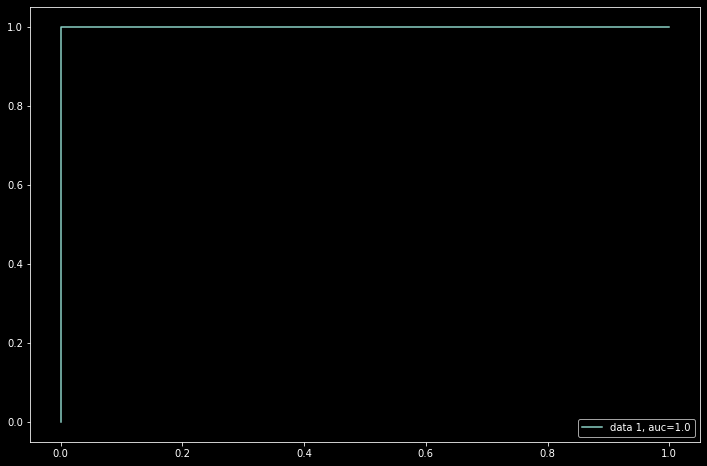

In [41]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(np.asarray(y_test),  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Task 5
Now, let's fit Multinomial Logistic regression to predict all categories. Firstly, we can start with **Univariate** model for these features number separately:
+ 4
+ 54
- 19

Check the contingency matrix to see the effect of particular features!! (each feature can be good in predicting different categories)

## only using 4/54/19

In [42]:
y_test = pd.read_fwf(y_test_path,names=['activity_type'])

In [43]:
y_train = pd.read_fwf(y_train_path,names=['activity_type'])

In [44]:
task_5 = ['4 tBodyAcc-std()-X','19 tBodyAcc-energy()-Z','54 tGravityAcc-min()-Y']

In [45]:
logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(X_train[task_5],y_train['activity_type'])
y_pred=logreg.predict(X_test[task_5])

/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
cnf_matrix = metrics.confusion_matrix(y_test['activity_type'], y_pred)
cnf_matrix

array([[293, 139,  64,   0,   0,   0],
       [199, 242,  30,   0,   0,   0],
       [102,  55, 263,   0,   0,   0],
       [  1,   2,   0, 343, 121,  24],
       [  0,   1,   0,  71, 460,   0],
       [  1,   0,   0,  38,  53, 445]])

In [47]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred,average='macro'))
print('Recall:',metrics.recall_score(y_test,y_pred,average='macro'))

Accuracy: 0.6942653545978962
Precision: 0.7021311939354627
Recall: 0.687105089890407


## multinomial of the rest

In [48]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='multinomial')

# fit the model with data
logreg.fit(X_train,y_train['activity_type'])

#
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test['activity_type'], y_pred)
cnf_matrix

/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[491,   0,   5,   0,   0,   0],
       [ 24, 444,   3,   0,   0,   0],
       [  3,  14, 403,   0,   0,   0],
       [  0,   3,   0, 430,  58,   0],
       [  0,   0,   0,  16, 516,   0],
       [  0,   0,   0,   0,   0, 537]])

In [49]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred,average='macro'))
print('Recall:',metrics.recall_score(y_test,y_pred,average='macro'))

Accuracy: 0.9572446555819477
Precision: 0.9591026060507161
Recall: 0.9563011471804064


## Task 6

Fit the Multinomial Logistic Regression model again. Now, try to choose **all** important features we have in the dataset. Who will get the best predictions with the smallest number of features?

[good info](https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499)

In [50]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [51]:
#since the accelerometers should work on the same magnitude we don't (assuming) need to scale
# scaler = StandardScaler()
# scaler.fit(X_train.fillna(0))

In [53]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',max_iter=300, solver='saga',multi_class='multinomial'))
sel_.fit((X_train.fillna(0)), y_train['activity_type'])

/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


SelectFromModel(estimator=LogisticRegression(C=1, max_iter=300,
                                             multi_class='multinomial',
                                             penalty='l1', solver='saga'))

In [54]:
sel_.get_support()[:18]

array([False, False, False,  True,  True, False,  True,  True, False,
        True, False, False,  True, False, False, False,  True, False])

In [55]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 561
selected features: 379
features with coefficients shrank to zero: 2683


In [56]:
selected_feat

Index(['4 tBodyAcc-std()-X', '5 tBodyAcc-std()-Y', '7 tBodyAcc-mad()-X',
       '8 tBodyAcc-mad()-Y', '10 tBodyAcc-max()-X', '13 tBodyAcc-min()-X',
       '17 tBodyAcc-energy()-X', '20 tBodyAcc-iqr()-X', '21 tBodyAcc-iqr()-Y',
       '22 tBodyAcc-iqr()-Z',
       ...
       '551 fBodyBodyGyroJerkMag-maxInds', '552 fBodyBodyGyroJerkMag-meanFre',
       '553 fBodyBodyGyroJerkMag-skewnes', '554 fBodyBodyGyroJerkMag-kurtosi',
       '555 angle(tBodyAccMean,gravity)', '556 angle(tBodyAccJerkMean),grav',
       '557 angle(tBodyGyroMean,gravityM', '558 angle(tBodyGyroJerkMean,grav',
       '559 angle(X,gravityMean)', '560 angle(Y,gravityMean)'],
      dtype='object', length=379)

In [57]:
np.sum(sel_.estimator_.coef_ == 0)

2683

In [58]:
removed_feats = X_train[selected_feat].columns
removed_feats

Index(['4 tBodyAcc-std()-X', '5 tBodyAcc-std()-Y', '7 tBodyAcc-mad()-X',
       '8 tBodyAcc-mad()-Y', '10 tBodyAcc-max()-X', '13 tBodyAcc-min()-X',
       '17 tBodyAcc-energy()-X', '20 tBodyAcc-iqr()-X', '21 tBodyAcc-iqr()-Y',
       '22 tBodyAcc-iqr()-Z',
       ...
       '551 fBodyBodyGyroJerkMag-maxInds', '552 fBodyBodyGyroJerkMag-meanFre',
       '553 fBodyBodyGyroJerkMag-skewnes', '554 fBodyBodyGyroJerkMag-kurtosi',
       '555 angle(tBodyAccMean,gravity)', '556 angle(tBodyAccJerkMean),grav',
       '557 angle(tBodyGyroMean,gravityM', '558 angle(tBodyGyroJerkMean,grav',
       '559 angle(X,gravityMean)', '560 angle(Y,gravityMean)'],
      dtype='object', length=379)

## Task 7 (Stretch)
Create your own function for Stepwise selection. Use either sklearn or statsmodel.

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

#data = load_boston()
#X = pd.DataFrame(data.data, columns=data.feature_names)
#y = data.target


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

#result = stepwise_selection(X, y)

#print('resulting features:')
#print(result)

In [ ]:
def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF = pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = d['Events'] / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = d['Non-Events'] / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars],
                            "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF


In [ ]:
train_data = pd.concat([X_train,y_train], axis=1)

In [ ]:
IV_Table = iv_woe(data = train_data, target = 'activity_type', bins=10, show_woe = False)

In [ ]:
IV_Table.loc[(IV_Table['IV'] >= 0.047)]

In [ ]:
IV_Table['IV']